作業1：

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

1. 你選的這組資料為何重要


2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)


3. 蒐集而來的資料型態為何


4. 這組資料想解決的問題如何評估


作業2：

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

3. 蒐集而來的資料型態為何

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

# 統計指標實作範例
## 常見於迴歸問題的評估指標
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)

## 常見於分類問題的指標
* Binary Cross Entropy (CE)

##### 後面的課程還會有更詳細的說明

In [1]:
import numpy as np
import matplotlib.pyplot as plt

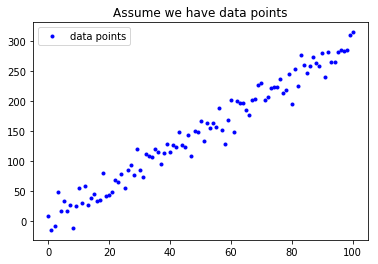

In [2]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

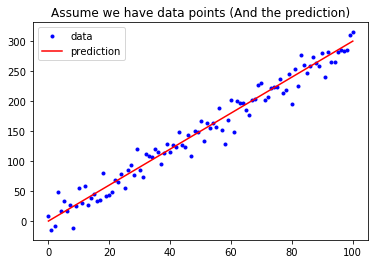

In [3]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [4]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

MAE = mean_absolute_error(y, y_hat)
print("The Mean absolute error is %.3f" % (MAE))

The Mean absolute error is 12.544


In [11]:
def mean_square_error(y, yp):
    """
    計算 MSE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mse: MSE
    """
    mse = MSE = sum((y-y_hat)**2)/len(y)
    return mse
MSE = mean_square_error(y, y_hat)
print("The Mean square error is %.3f" % (MSE))



The Mean square error is 255.611


In [14]:
"""
利用現成的工具進行驗證，確認無誤。
"""
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_hat)
print("The Mean square error is %.3f" % (mse))

The Mean square error is 255.611


## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)